In [1]:
from PIL import Image
Image.MAX_IMAGE_PIXELS = 1000000000 

# Classification Analyses for Movement phases

## The only difference between the current update and the previous week's was that now I am performing a classification analyses for the beta weights when participants are moving

*If you remember classifications methods from the previous updates and/or don't care, skip the classification description text!*

## TO NOTE

- Beta weights are computed for each movement trial x direction separately
    - This gives 20 (5x4) beta weights per block
- Preparation beta weights were no longer separated by trials. This I made a conscious choice to not overfit the GLM 
    - Thus, only 4 prep beta weights -- one for each direction

### Within Block Classifications

Three classifiers were fit to predict the target location to data of 18 subjects using the following procedure: 
1. This was done as a 4-class classification (as opposed to one vs rest from previous update).
2. Cross-Validation
    1. For each block, I performed a 5-fold cross validation 
    2. One data point from each class was held out and a classifier was trained on the remaining 4.
    3. It was then tested on the held out data point. 
    4. A different data point was held out and the process repeated along steps B and C. 
        - The classifiers for each target location is tested for the held out data point to drive predictions. (This is a bit of a black box function that I am not manually implementing.) 
3. The data that is shown below is the average predictions of all held out test points during the cross validation procedure. The classifier was asked to spit out the probabilities indicating how likely the data is from one of the four target locations. 

#### Data From All (19) Subjects

Components of the following plot:
- Rows are Different ROIs
- Columns are separated by the target location the classifier was trained to predict -- these are the "true" labels.
- Y-axis is the probability of data belonging to a particular class which are listed on the x-axis.
- Different colors are the three different classifiers (Blue = <font color = 'Blue'> SVM </font>, Green = <font color = 'Green'>KNN</font>, Orange = <font color = 'orange'>Decision Tree</font>) 


Interestingly, this multi-class classification approach (as opposed to one vs rest classification) leads to really poor SVM performance, as compared to other classifiers. It does okay for V1, but for the rest, it's pretty much at chance 

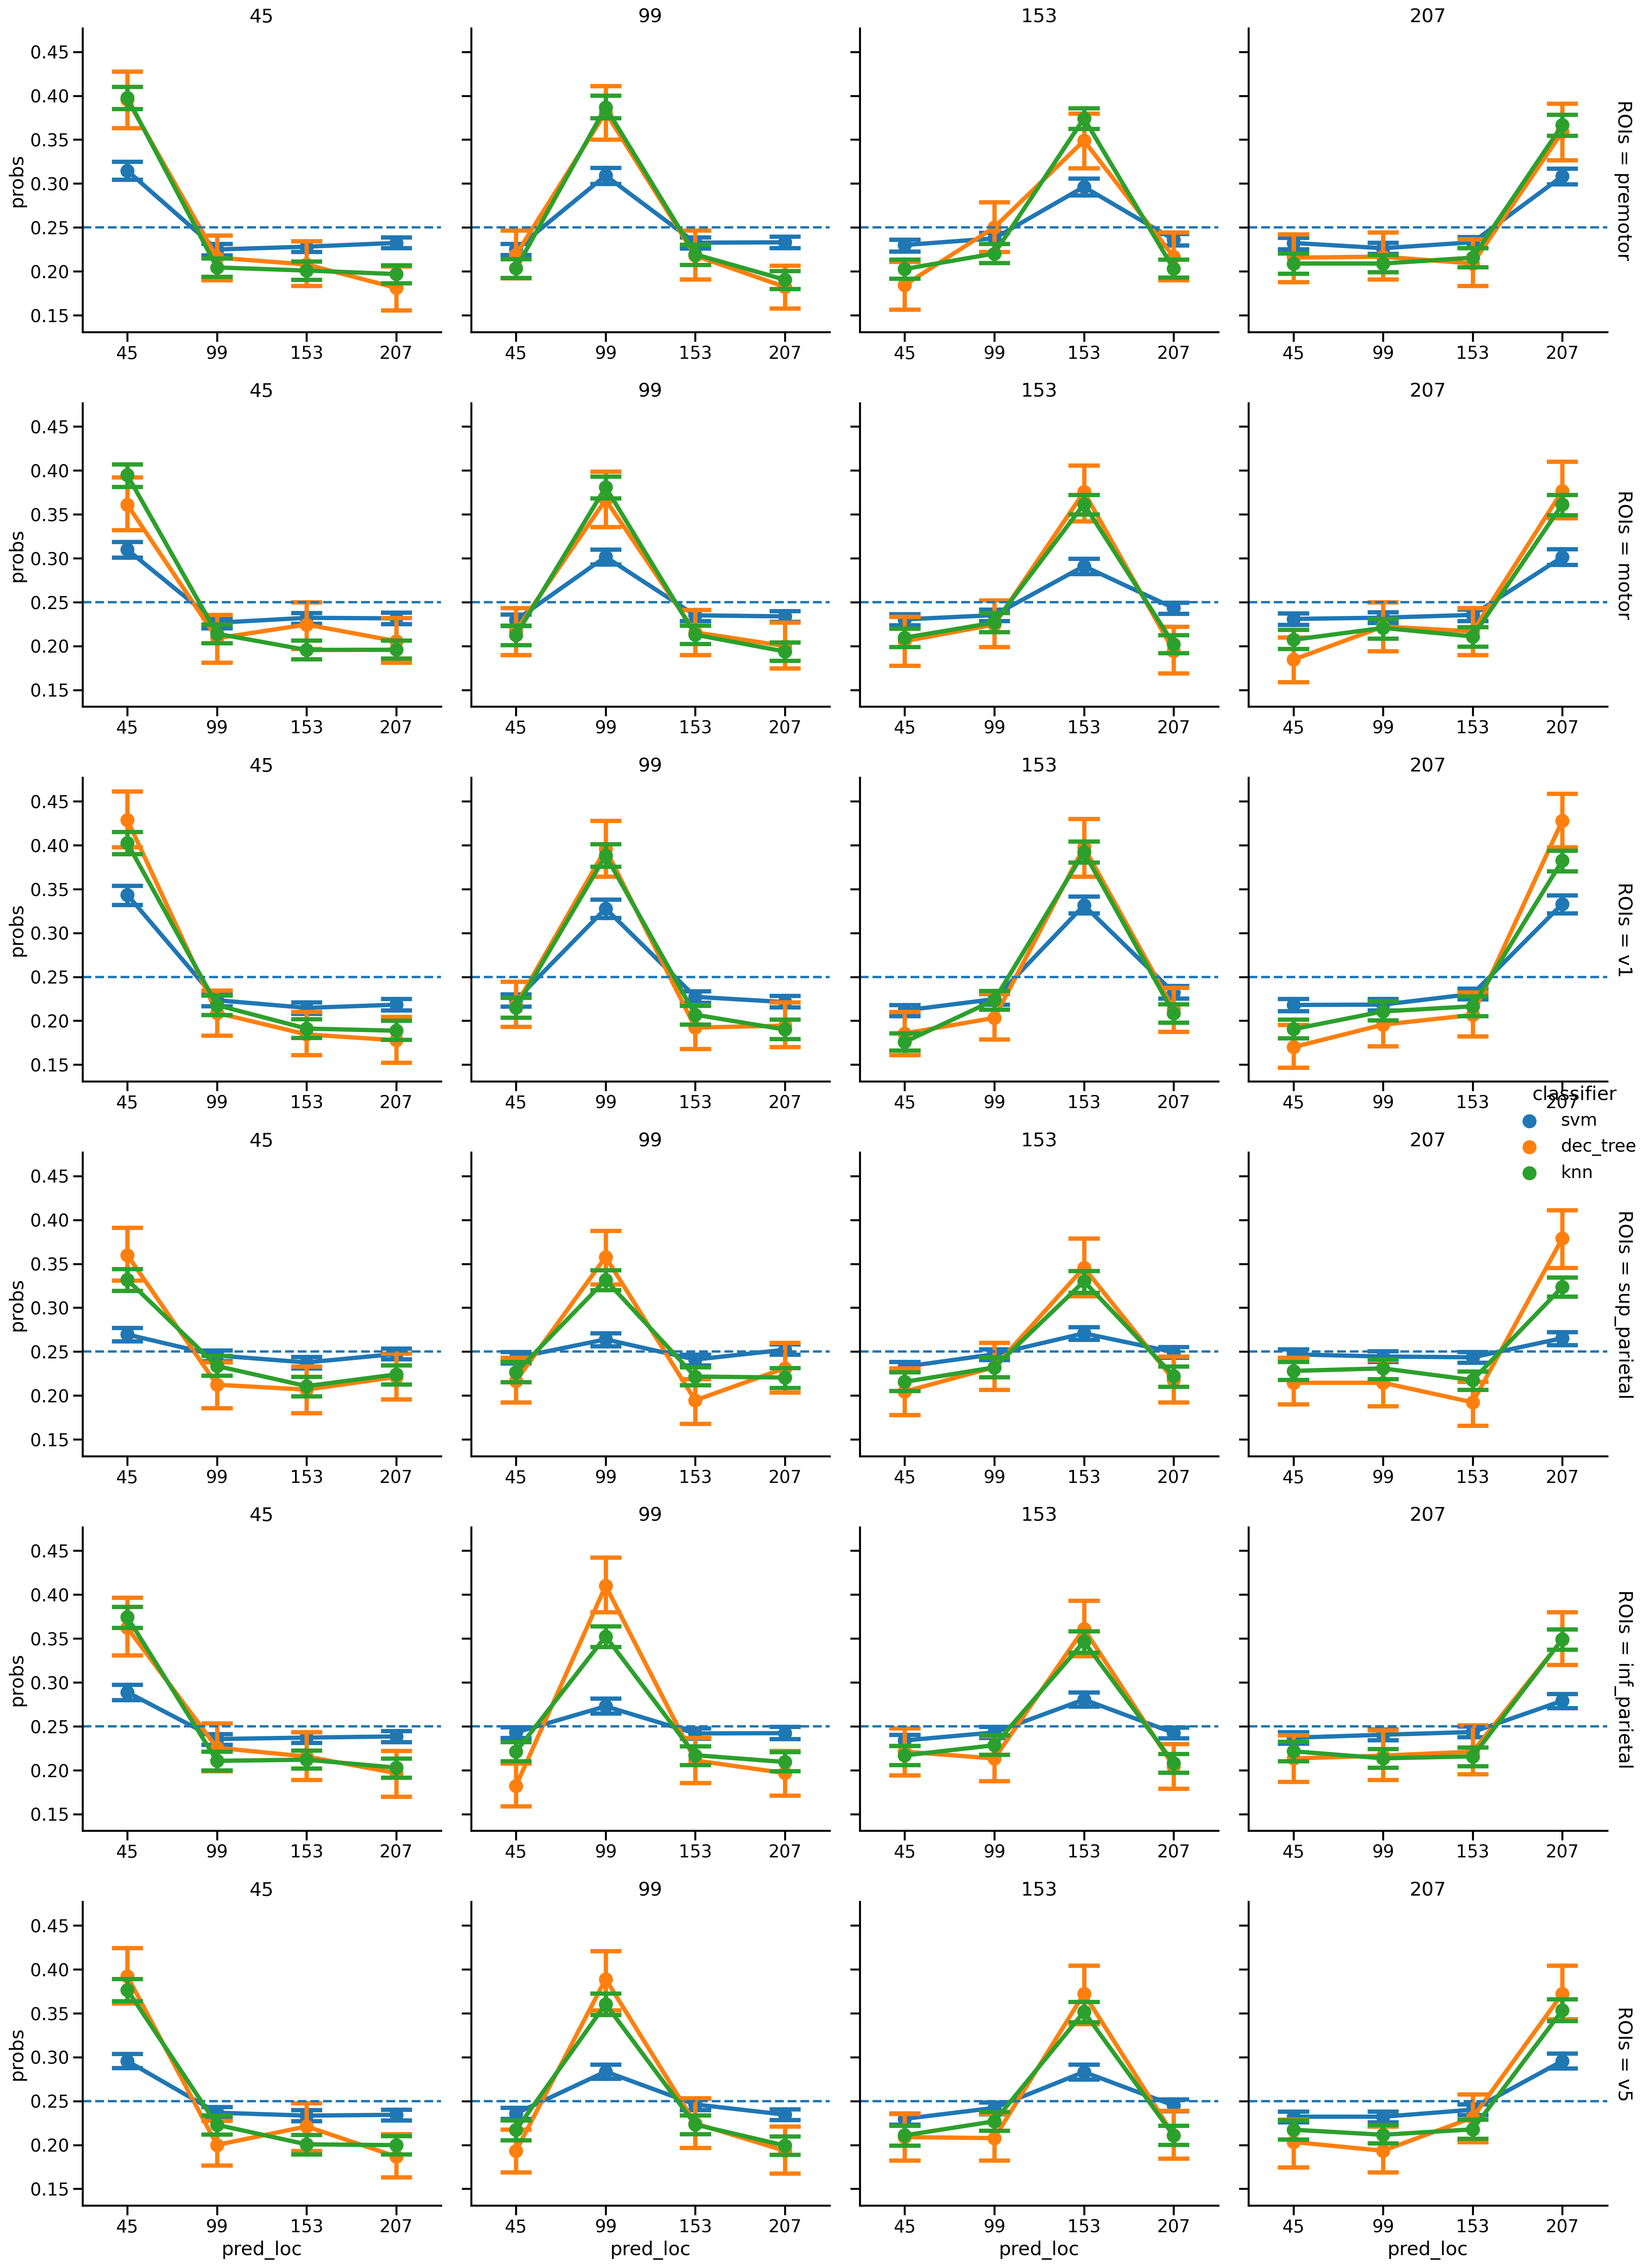

In [4]:
Image.open('plots_for_meeting/within_classification/with_mov_class_pred.png')

### Between Block Classification

Three Classifiers were fit to predict the target location to data of 18 subjects using the following procedure. 
1. A Similar "multiclass" classifier as before was used to fit the data in every straight shooter block separately for each of the straight shooter block.
2. The classifier was then asked to predict the target location for each of the rotated block's data that immediately followed the straight shooter block that the classifier was fit to. That is, if the classifier was fit to block 1, it was asked to predict the target locations of block 2, and so on.
3. No cross validation was performed since there is a clear test-set split in this comparison
4. Training and test data were **not** separated by runs -- instead all straight shooter blocks were included in training data and all rotated blocks were included in test data

#### Data from all (19) subjects

Compontents of the following plot
- Rows are different ROIs
- Columns are separated by the "true" target location in the rotated block. 
- X axis is the prediction labels, y axis is the prediction probabilities.
- The marked asterisk point is the one that is the closest aiming direction to the target location
- The horizontal blue dashed line is chance (25%)
- Different colors are the three different classifiers (Blue = <font color = 'Blue'> SVM </font>, Green = <font color = 'Green'>KNN</font>, Orange = <font color = 'orange'>Decision Tree</font>) 

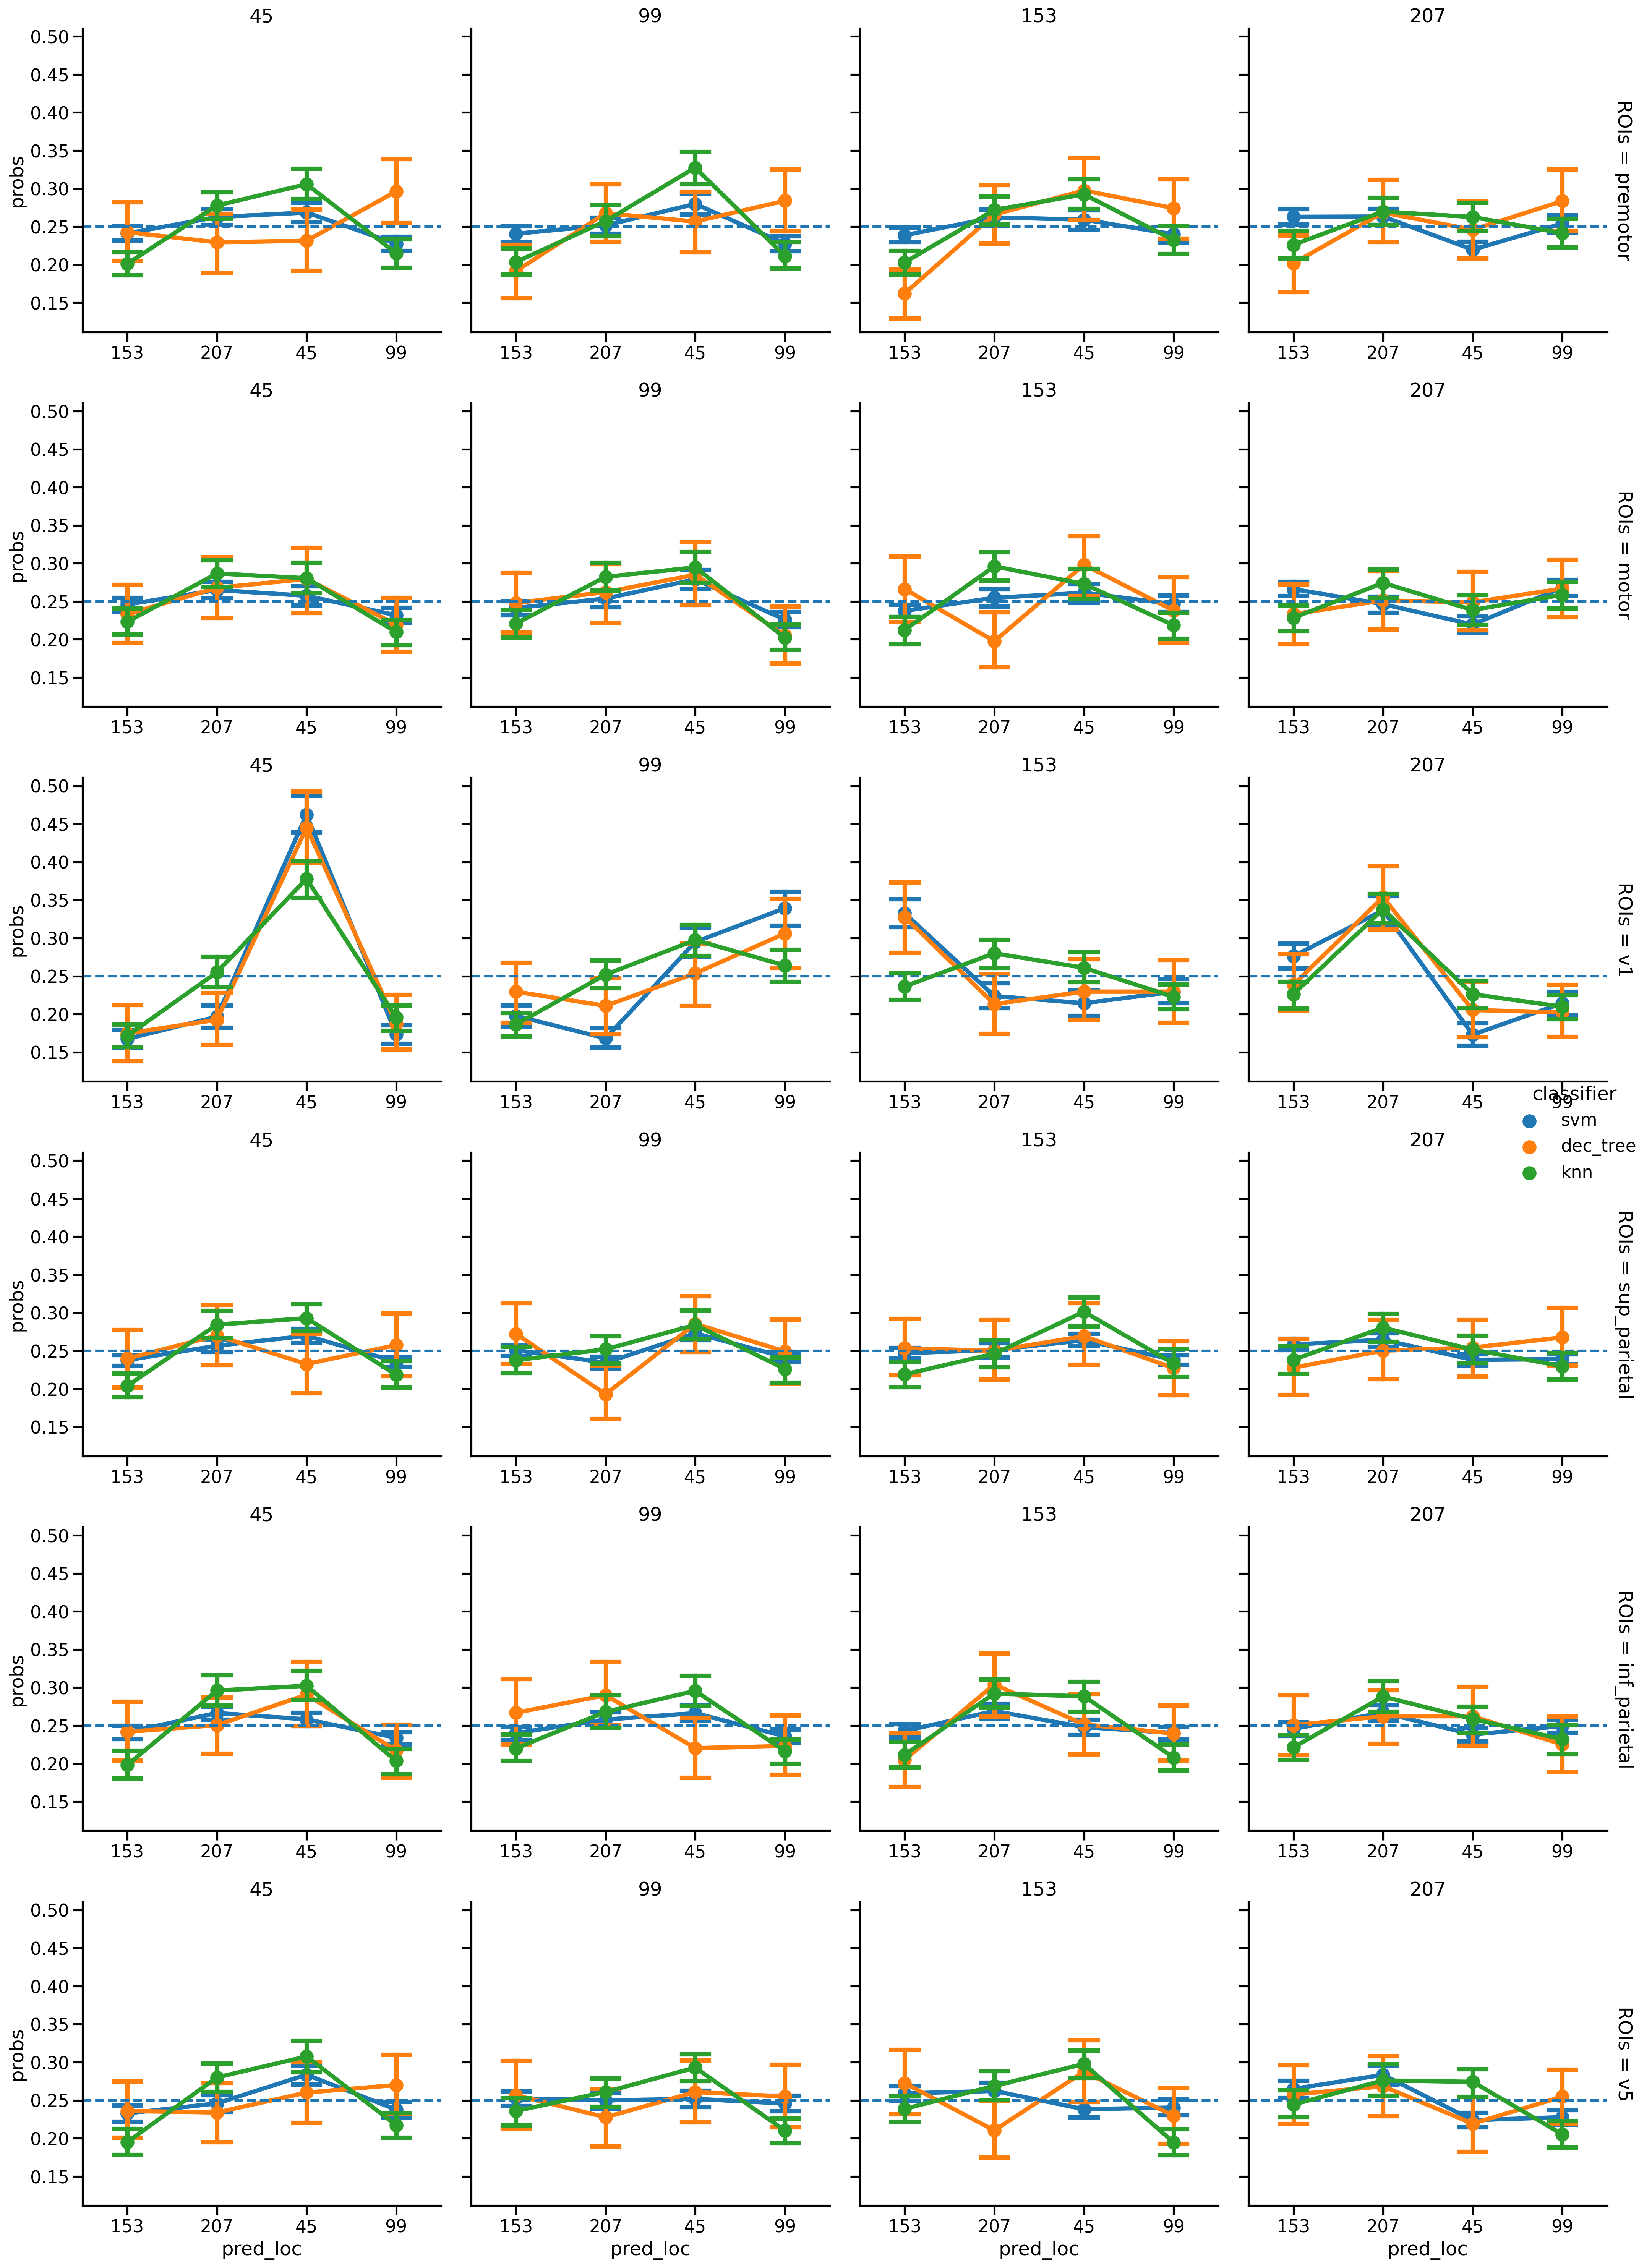

In [2]:
Image.open('plots_for_meeting/between_classification/bw_mov_class_pred.png')

#### Aim Difference Plots
Instead of using a single asterisk, I thought it might be useful to look at prediction probabilities as a function of aiming differences. 



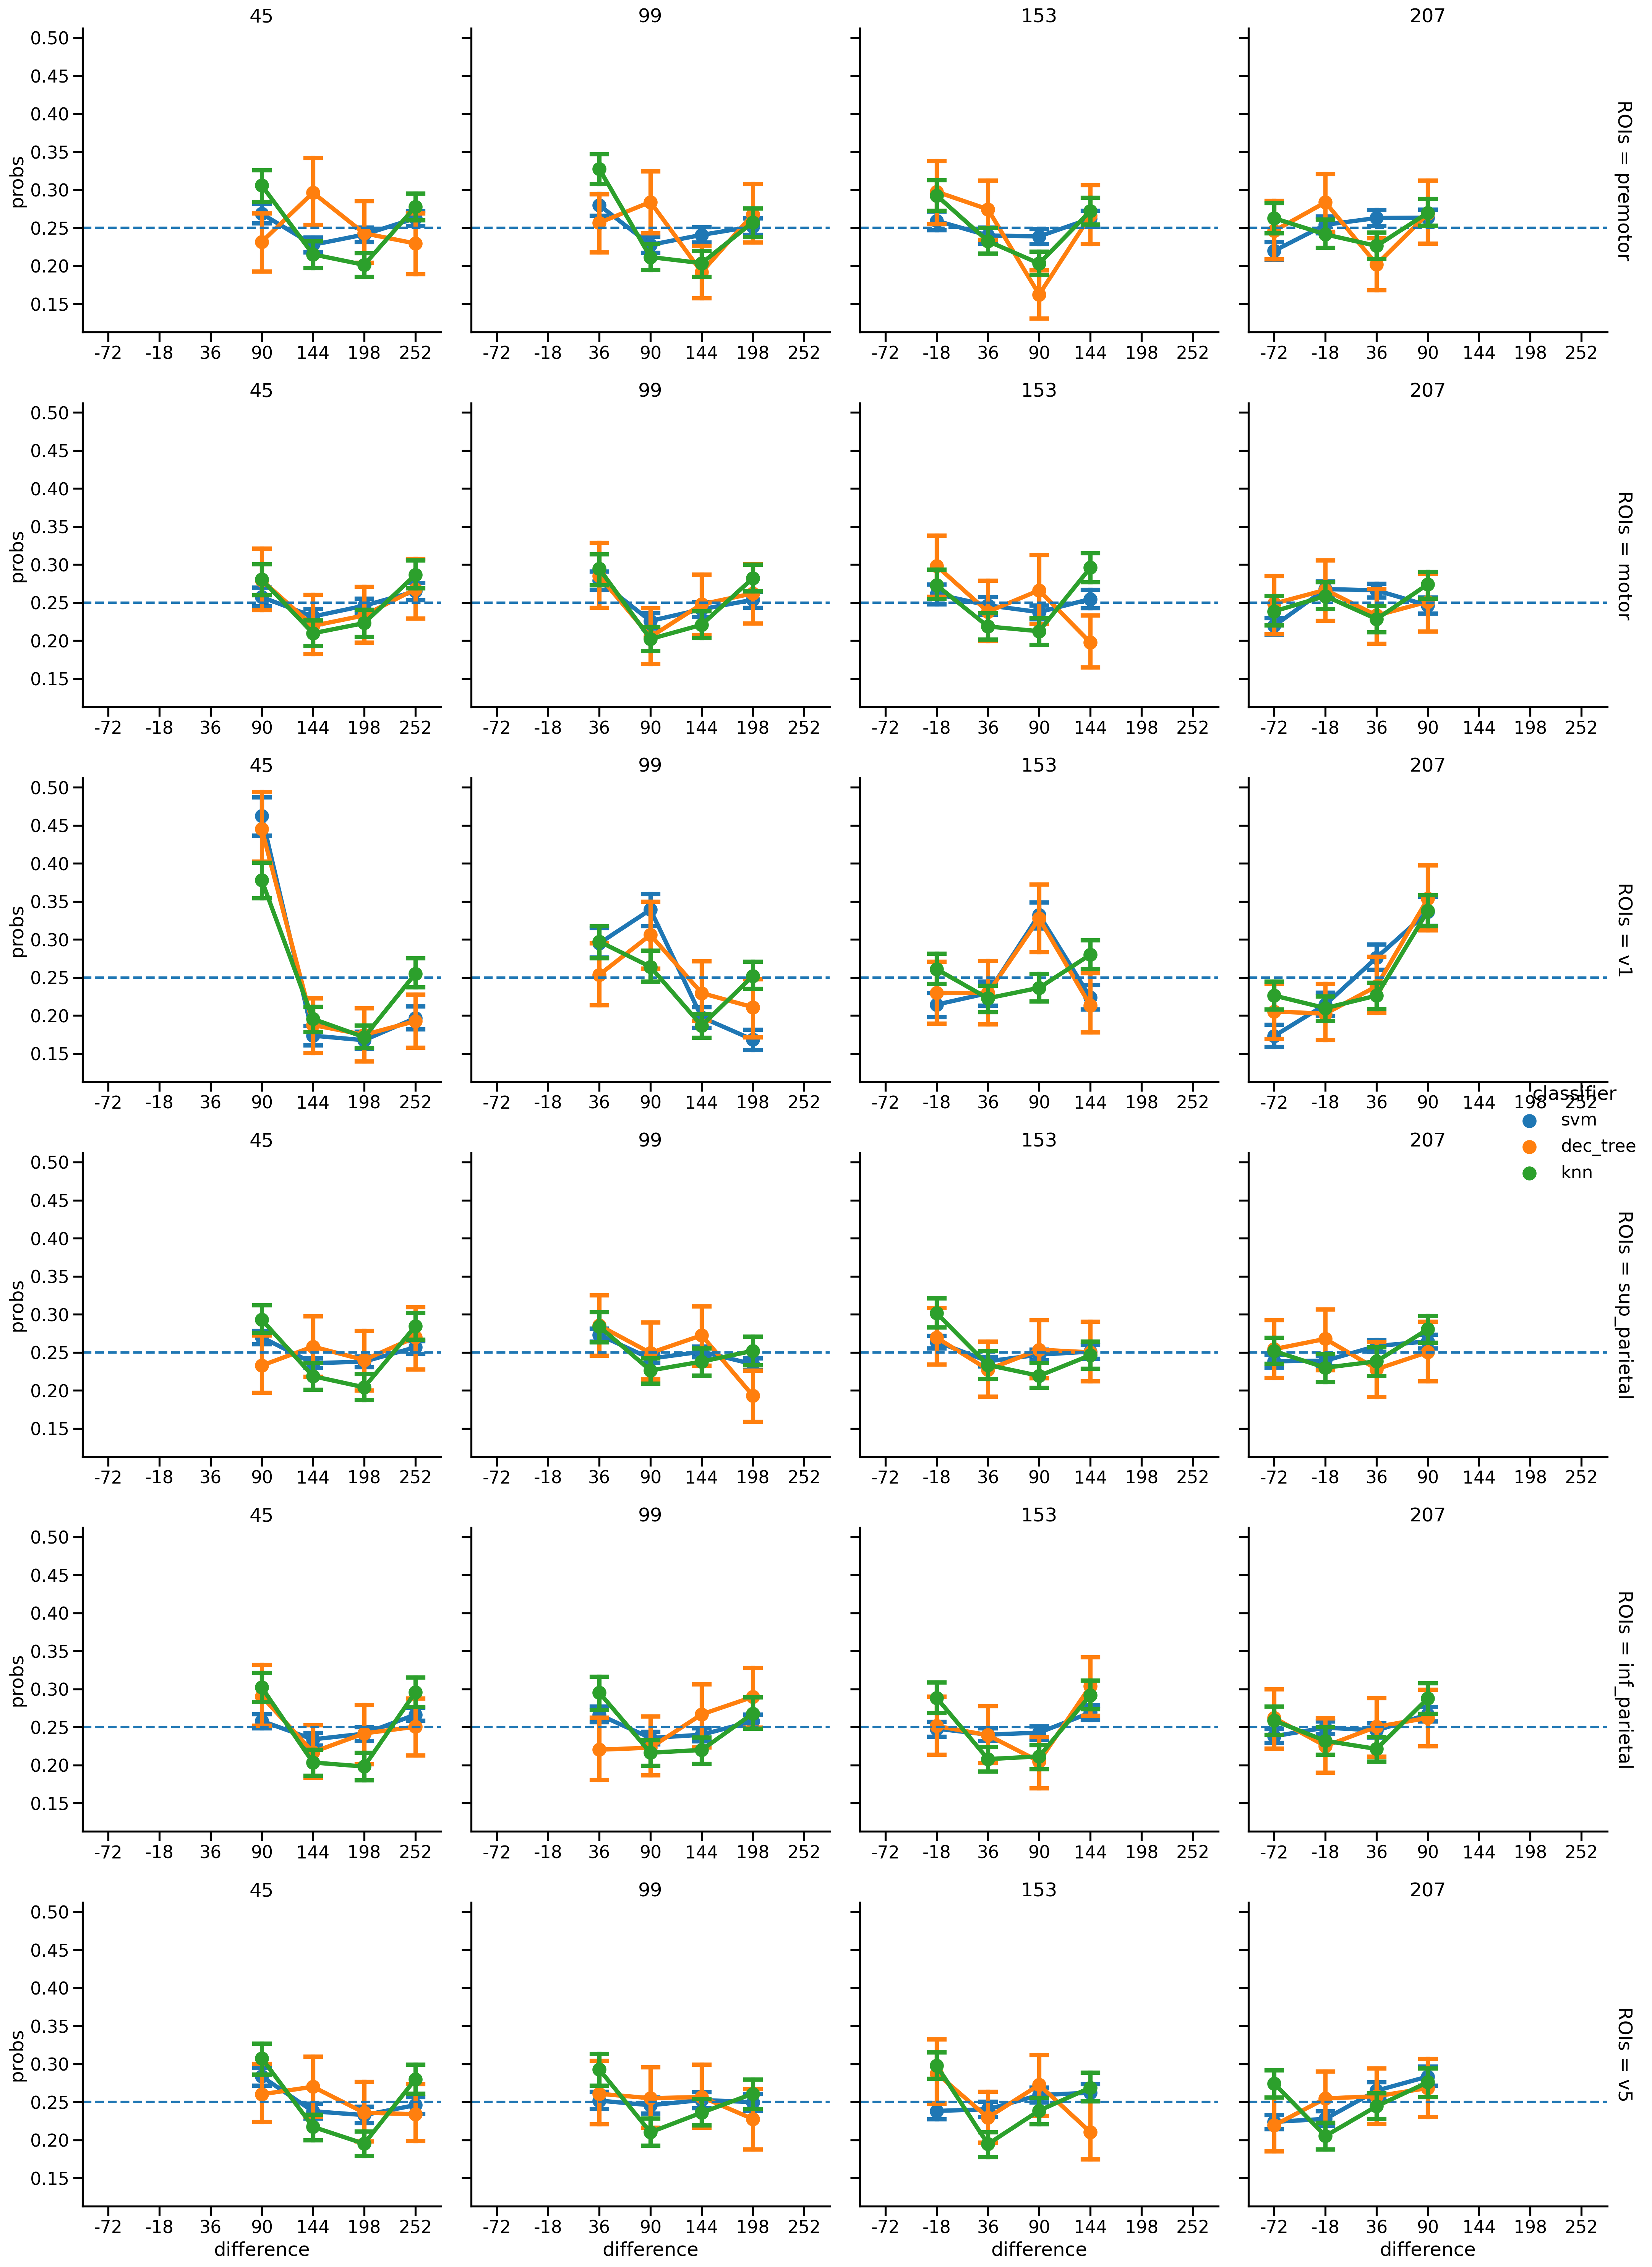

In [3]:
Image.open('plots_for_meeting/between_classification/bw_mov_aim_diff.png')


## Testing whether it's a "right bias" for rotation

We had decided to test this idea that maybe in the rotation blocks, participants don't actually perform rotations, but ar generally aiming towards the right of the target. 

To test that, 
- A Neural Network (NN) Classifier was trained to recognize rotation vs straight shooter trial. I chose a Neural Network because 
    - it allows to extract the weights of the classifier while constructing a non-linear classification. SVM does not allow that. 
    - it allows to test different levels of similarity in some sense by reading out the weights from different layers.
- A separate NN classifier was trained to recognize 45-degree preparation time vs other directions' preparation time *for the straight shooter blocks*
- Weights of the two classifiers were correlated for all layers of the two neural network classifiers. That is layer 1 of the first classifier was correlated with layer 1 of the second classifier. 
- The plot below shows this only for movements (and not prep) because I stupidly didn't save the prep time results before rerunning and overwriting it for movement times. :(

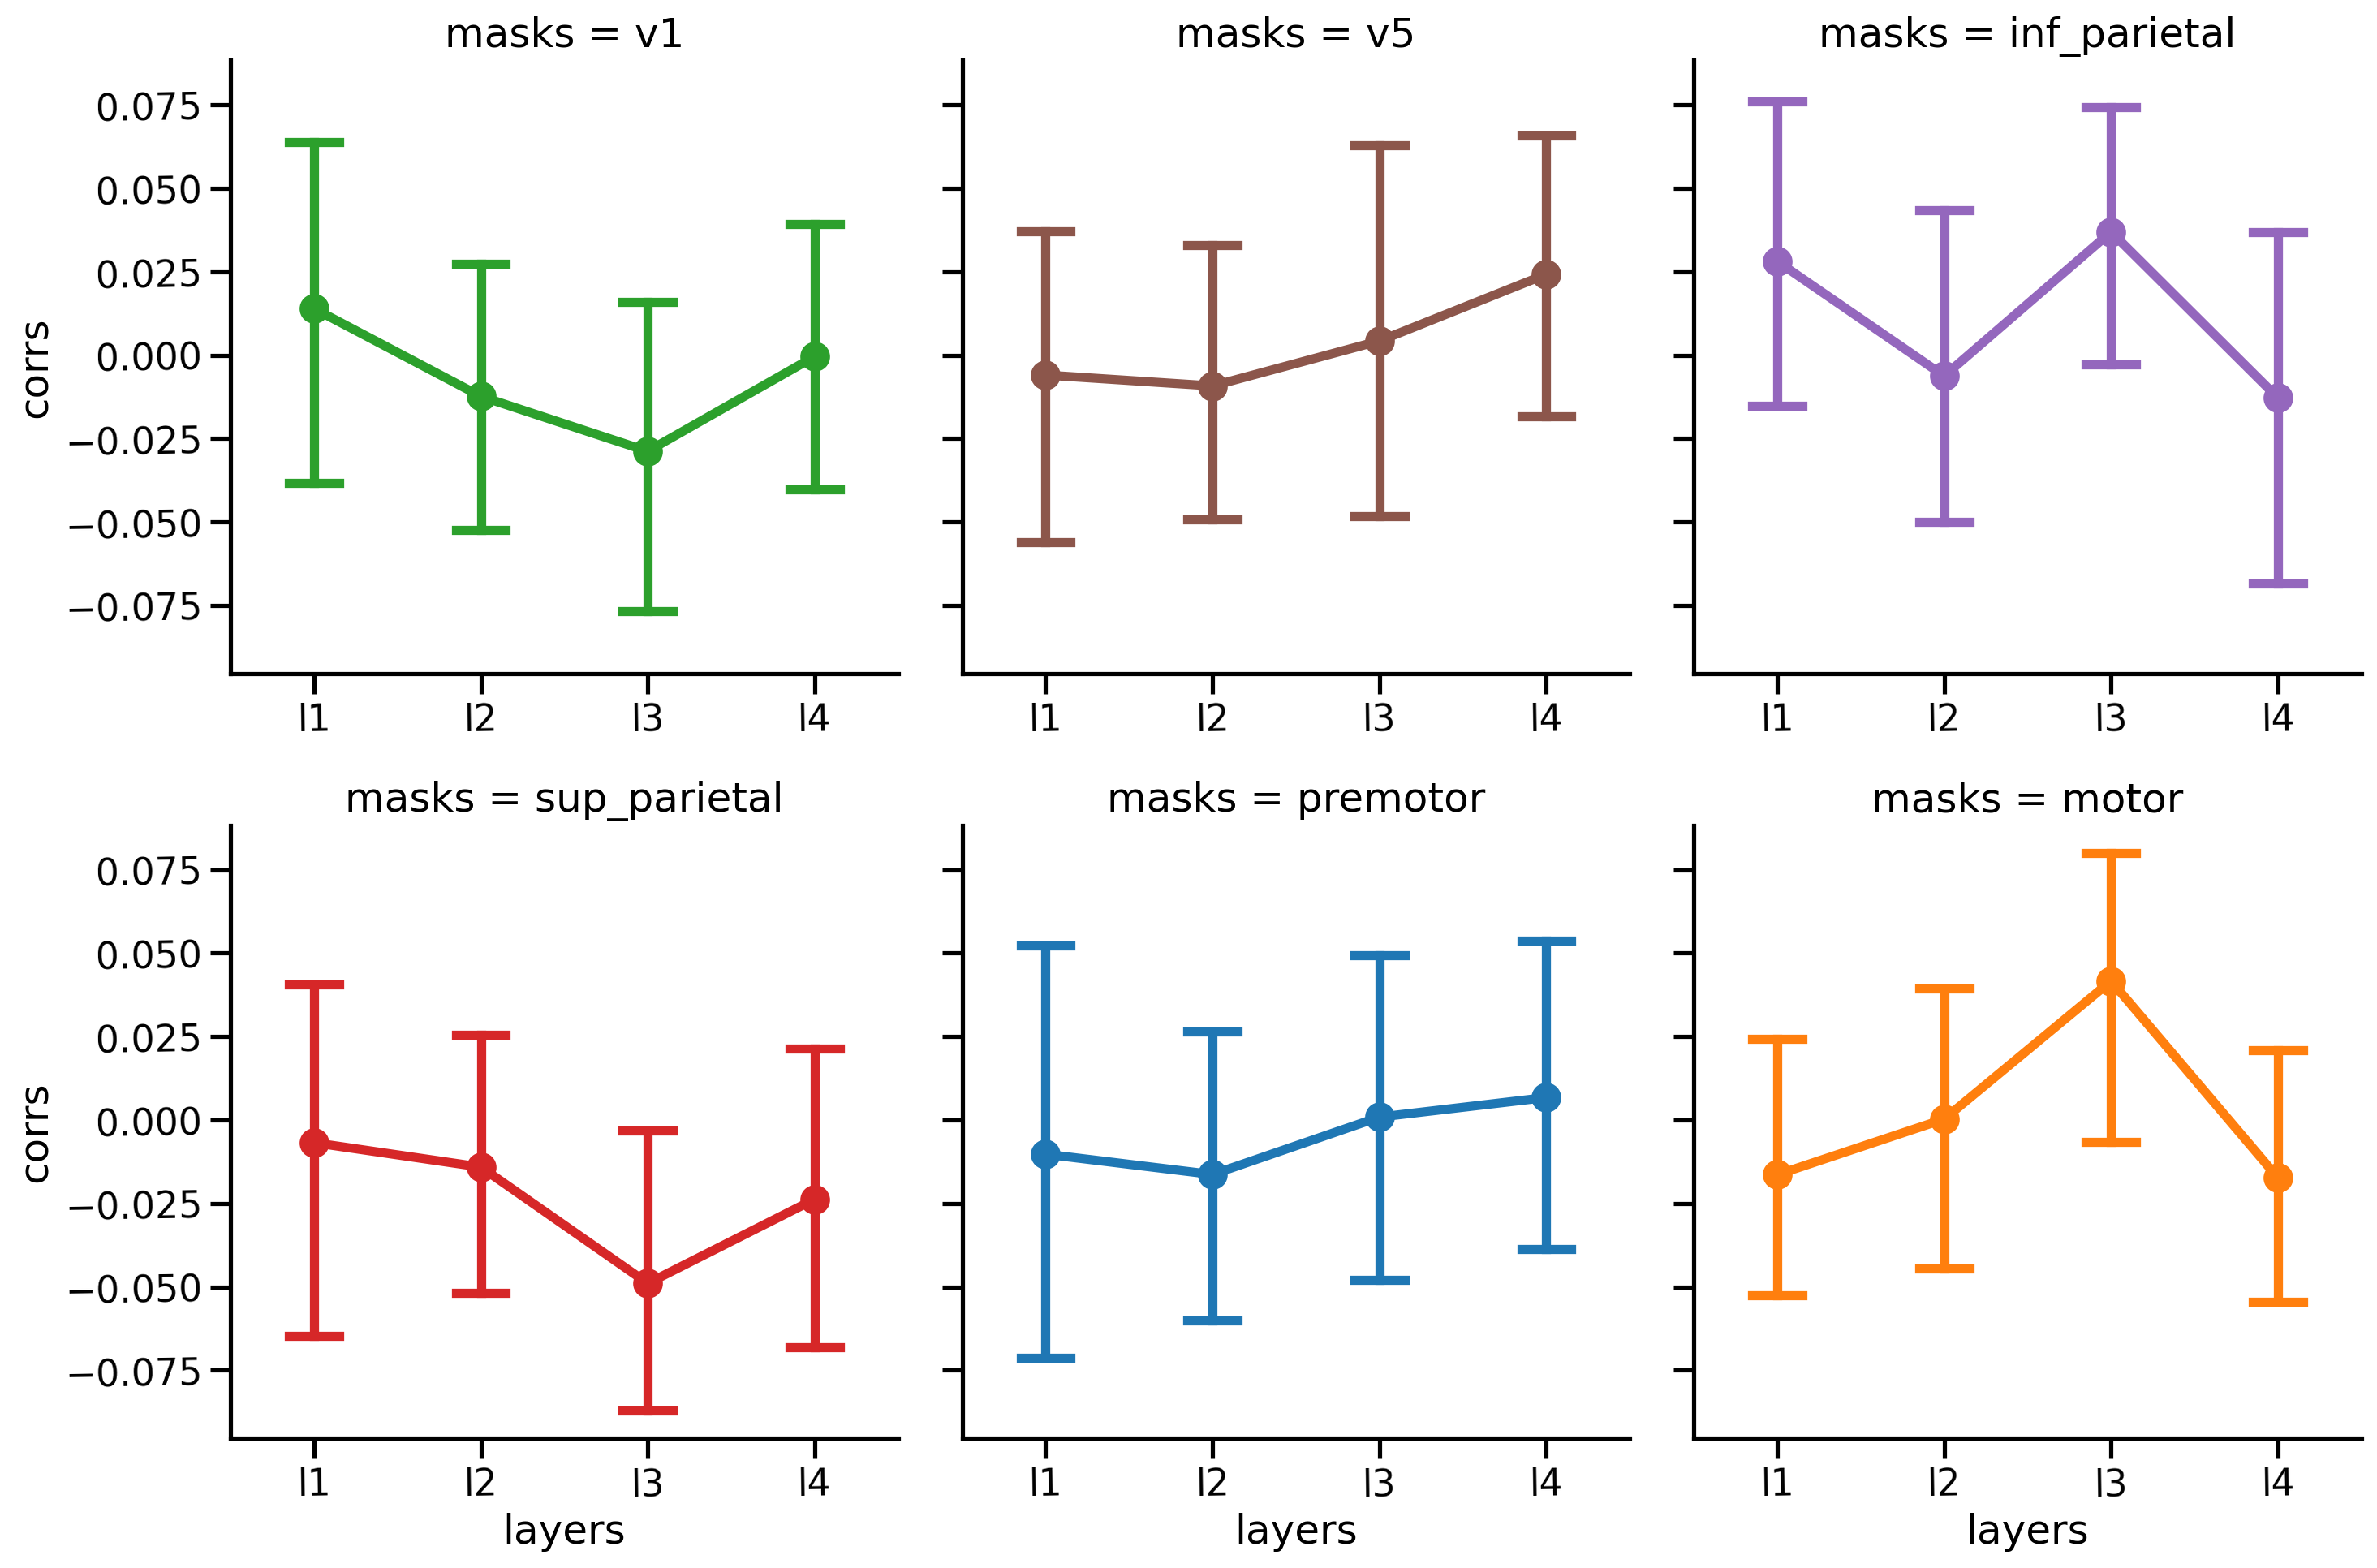

In [5]:
Image.open('plots_for_meeting/within_classification/45_rot_weight_corrs.png')

## Conclusions

1. There's good tuning during the movement time as well -- as depicted in high prediction accuracies in the within block classifiers (also in within block correlations, but I'm not showing that plot here)
2. Motor and premotor sorta show slightly higher accuracies for $-18^\circ$ aim differences, maybe interesting?
3. The weight correlations are not really meaningful. They're both not that high, and not that often significant.


Generally, I'm now thinking that I'm not entirely sure if we necessarily want to expect higher correlations/classification accuracies for smallest aiming difference (18 degrees) -- one major reason why we chose the rotation and target locations is such that participants don't just aim at the location of a different target. 

If we did indeed observe higher correlation for -18, that would imply that participants did aim towards the closest different-target. Which they might not be doing because while -18 corresponds to the lowest aim difference, the target that is -18 isn't the immediate next target in the rotation phase. 

For example: So for 207-rotated, -18 corresponds to 99. But the closest target to 207 is 153